In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex

# **Fundamentals of Image Processing in OpenCV-Python**

A Bird of Feature Workshop by University of Florida Research Computing

Yunchao Yang 

>This workshop provides an introduction to basic image processing techniques using the OpenCV-Python  library and some standard data analysis libraries in Python. Knowledge of image processing and Python programming is not required for this workshop, but will help.

*Useful Links and Materials 
  - Hands-on exercises using Jupyter Notebooks. UFRC practiumAI.org: https://practicumai.org/
  - intro to [OpenCV](https://opencv.org/)*



## Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pillow](https://pillow.readthedocs.io/en/stable/index.html/) is an Python Imaging Library, friendly PIL fork.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.


In [2]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.2


## Read/display an image

> First, CV libraries can read images from urls or from local file system into memory, and we can display it using matplotlib in jupyter notebook. Please pay attention to the channel order for different libraries. The default input color channels are in BGR format for openCV, while the default color channels is RGB for Pillow and skimage.


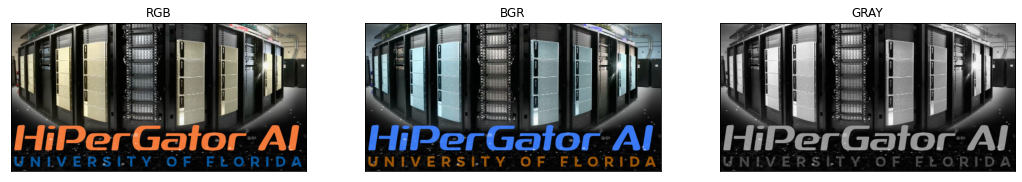

In [3]:
# Read local files
file = "hpgai.slider-544x273.png"

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Read and display the image
image = io.imread(file) 
image_cv2 = cv2.imread(file)
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)

images = [image, image_cv2, image_gray]
titles = ["RGB", "BGR", "GRAY"]

for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


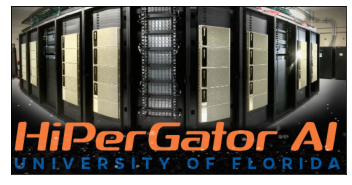

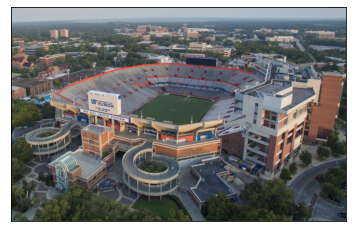

In [4]:
# Read image from remote 
urls = ["https://www.rc.ufl.edu/media/rcufledu/banners/hpgai.slider-544x273.png",
        "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/BenHillGriffinStadium.png/1280px-BenHillGriffinStadium.png"]
for url in urls:
  image = io.imread(url) 
  plt.figure(figsize=(6, 6))
  plt.xticks([]),plt.yticks([])
  plt.imshow(image)

## Properties of an Image
- type
- datatype
- shape
- Slicing pixel intensity values

In [7]:
# Check the image data type
image = cv2.imread('hpgai.slider-544x273.png', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"image.type: {type(image)}")
print(f"image.datatype: {image.dtype}")
print(f"image height: {image.shape[0]}")
print(f"image width: {image.shape[1]}")
print(f"number of channels: {image.shape[2]}")
print("slicing right-upper 2 by 2 corner:")
print(image[:2, :2, :])  # Right-upper-most few pixels of the image

image.type: <class 'numpy.ndarray'>
image.datatype: uint8
image height: 273
image width: 544
number of channels: 3
slicing right-upper 2 by 2 corner:
[[[71 70 62]
  [72 72 63]]

 [[72 71 63]
  [73 72 64]]]


### Image Crop

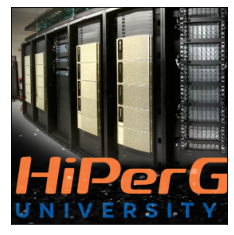

In [8]:
#slicing parts of an image using numpy slicing notations
roi = image[:,0:image.shape[1]//2,:] # slicing a quarter of top part.
plt.xticks([]),plt.yticks([])
plt.imshow(roi)

### Image Blurring

### Gaussian Blur
The function  <code>GaussianBlur</code> convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:

Parameters

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>


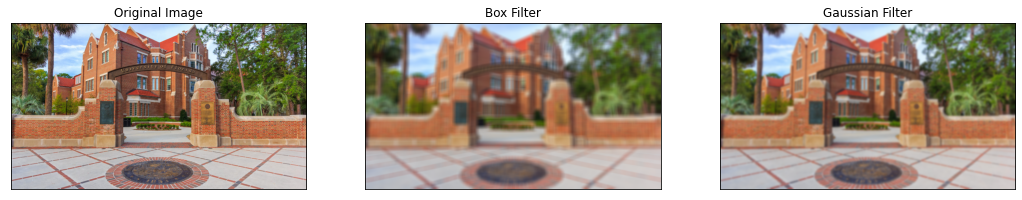

In [9]:
image = cv2.imread('florida-1200x675.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ksize = (20, 20)

box_blurred = cv2.blur(image, ksize) 
gass_blurred = cv2.GaussianBlur(image, (21,21), 0)

titles = ['Original Image','Box Filter','Gaussian Filter']
images = [image, box_blurred, gass_blurred]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Thresholding

- The simplest segmentation method
- applications: separate out regions of interest in an image.
- set determined value to identify them 

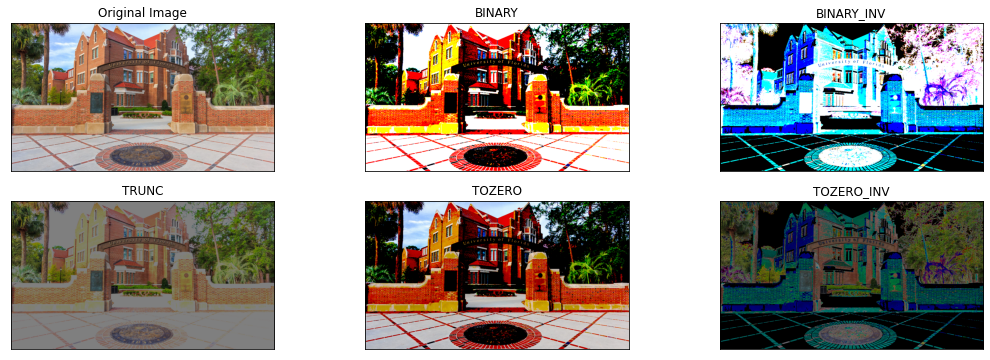

In [11]:
# thresholding
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

fig, axs = plt.subplots(2, 3, figsize=(18, 6))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


## Edge Detection and Image Gradients

Image gradients can be used to extract information from images. Gradient images are created from the original image (generally by convolving with a filter, one of the simplest being the Sobel filter.
Each pixel of a gradient image measures the change in intensity of that same point in the original image, in a given direction. To get the full range of direction, gradient images in the x and y directions are computed.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(([], []), ([], []))

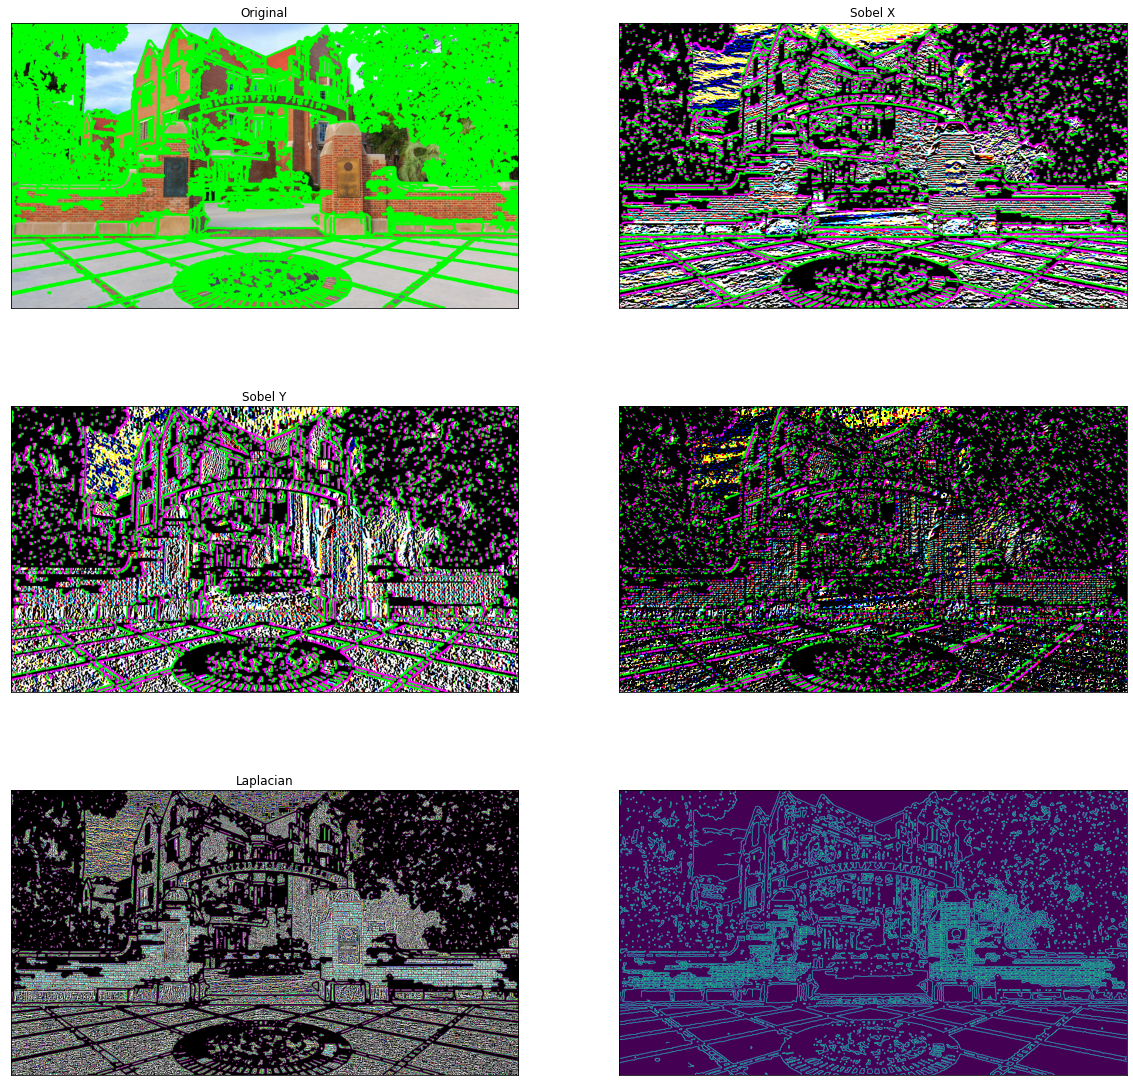

In [51]:
hgt, wdt,_ = image.shape
# Sobel Edges
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.xticks([]),plt.yticks([])

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.xticks([]),plt.yticks([])

plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)
plt.xticks([]),plt.yticks([])

sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)
plt.xticks([]),plt.yticks([])

laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)
plt.xticks([]),plt.yticks([])

## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)
plt.xticks([]),plt.yticks([])


## Draw Objects on Images
In this section, we will learn how to draw geometric shapes with OpenCV drawing functions. The drawing functions inclues:
`cv2.line(), cv2.circle(), cv2.rectangle(), cv2.ellipse(), cv2.putText()`. In these functions, you will have to input the necessary arguments: image, color, thickness, lineType to define the geometry shape, attributes, and properties.

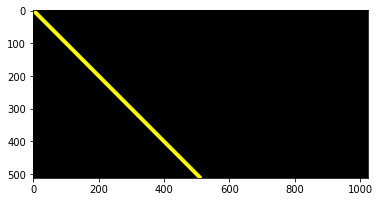

In [13]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)

# Draw a line using cv2.line(image, startPoint, endPoint, rgb, thinkness)
cv2.line(img2, (0,0), (511,511), (255,255,0), 10) 
# => Diagonal red line with thickness of 10 px

plt.imshow(img2)


Try to draw different object on the canvas

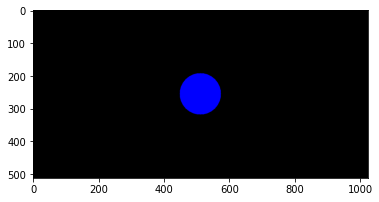

In [14]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv2.circle(img2, (511,255), 63, (0,0,255), -1)
# => Blue filled circle(note that the thinkness is -1)
plt.imshow(img2)

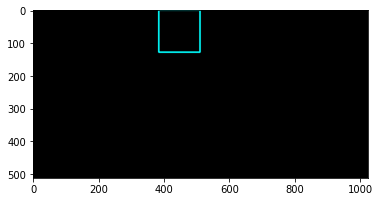

In [15]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(img2, (384,0), (510,128), (0,255,255), 3)
# => Green rectangle with thickness of 3 px
plt.imshow(img2)

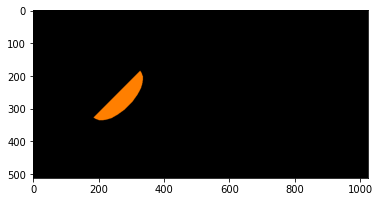

In [16]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv2.ellipse(img2, (256,256), (100,50), -45, 0, 180, (255,127,0), -1)
# => Red wide down-half ellipse
plt.imshow(img2)

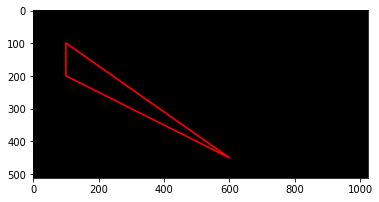

In [17]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)

# Draw a line using cv2.polylines(image, points, isClosed, rgb, thinkness, lineType, shift)
pts = np.array([[100,100],[100,200],[300,300],[600,450]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img2,[pts],True,(255, 0,0),3)
# => Cyan closed quadrangle 

plt.imshow(img2)

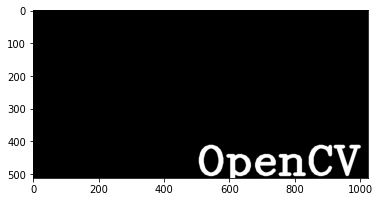

In [18]:
# Create a black image
img2 = np.zeros((512,1024,3), np.uint8)
# Put some text
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img2, 'OpenCV', (500,500), font, 4, (255,255,255), 10, cv2.LINE_AA)
plt.imshow(img2)

## Modify pixels & ROI
You can access/modify a single pixel or ROI using Numpy indexing.
Just like matrix indexing, img[a, b] refer to a-th row and b-th column.

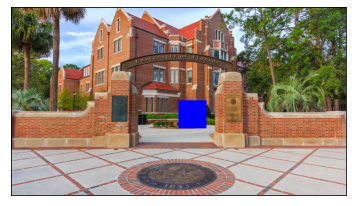

In [53]:
image = cv2.imread('florida-1200x675.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Change pixel values
for i in range(100):
    for j in range(100):
        image[image.shape[0]//2+i, image.shape[1]//2+j] = (0, 0,255)
plt.xticks([]),plt.yticks([])
plt.imshow(image)


### Histogram 
Sometimes you want to enhance the contrast in your image or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the matplot.pylab `hist()` function.


Display the histogram of all the pixels in the color image

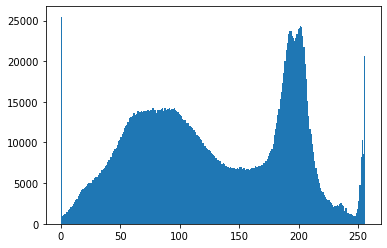

In [42]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

Display the histogram of R, G, B channel
 cv.calcHist() is to find the histogram of the full image. 

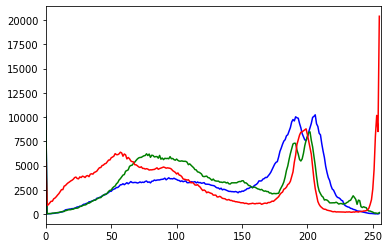

In [43]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

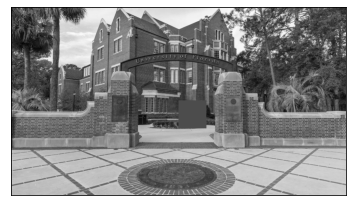

In [54]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.xticks([]),plt.yticks([])
plt.imshow(gray_image,cmap='gray', vmin=0, vmax=255)

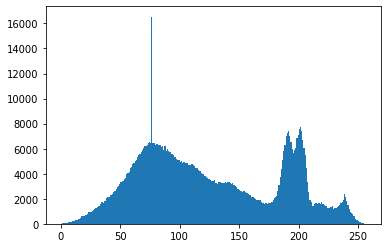

In [56]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

## Geometric operations
- scaling
- translation
- rotation
- interpolation
- 


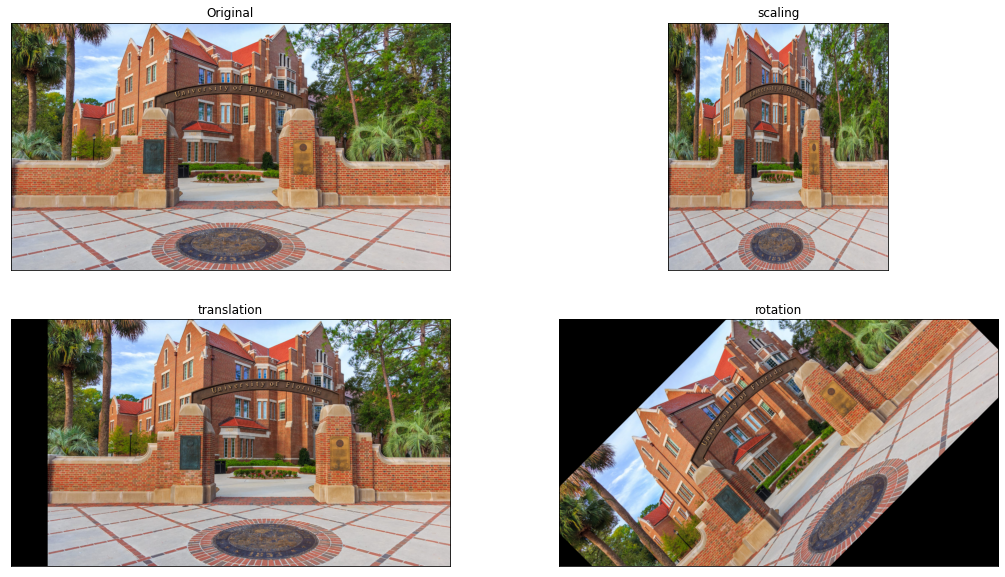

In [61]:
image = cv2.imread('florida-1200x675.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.subplot(2, 2, 2)
new_image = cv2.resize(image, None, fx=1, fy= 2, interpolation= cv2.INTER_CUBIC)
plt.title("scaling")
plt.xticks([]),plt.yticks([])
plt.imshow(new_image)

# Translation
plt.subplot(2, 2, 3)
tx = 100
ty = 0
rows,cols,channel = image.shape
M = np.float32([[1,0,tx],[0,1,ty]])
new_img = cv2.warpAffine(image, M, (cols, rows))
plt.title("translation")
plt.xticks([]),plt.yticks([])
plt.imshow(new_img)

plt.subplot(2, 2, 4)
# Rotation
theta = 45.0
rot_mat  = cv2.getRotationMatrix2D(center=(cols//2-1,rows//2-1),angle=theta, scale=1)
rotate_img = cv2.warpAffine(image, rot_mat, (cols, rows))
plt.title("rotation")
plt.xticks([]),plt.yticks([])
plt.imshow(rotate_img)


## Contours
Image Contours – It is a way to identify the structural outlines of an object in an image. It is helpful to identify the shape of an object. OpenCV provides a findContours function in which you need to pass canny edges as a parameter.

Count of Contours  = 2174


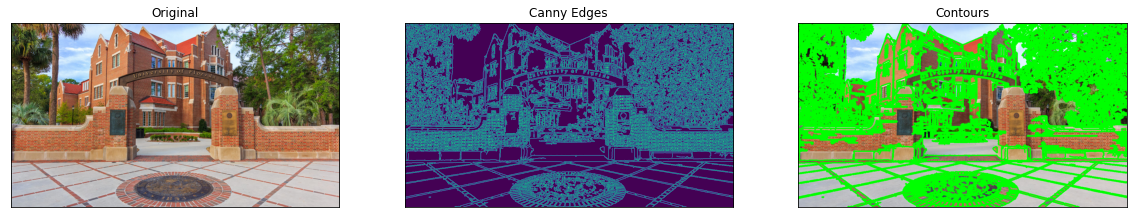

In [63]:
# Load the data
image = cv2.imread('florida-1200x675.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.xticks([]),plt.yticks([]), plt.title("Original")
plt.imshow(image)

# converted to Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Canny edges
edged = cv2.Canny(gray, 30, 200)
plt.subplot(1, 3, 2)
plt.xticks([]),plt.yticks([]), plt.title("Canny Edges")
plt.imshow(edged)

# Finding Contours
contours, hier = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Count of Contours  = " + str(len(contours)))

# Draw contours
plt.subplot(1, 3, 3)
cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.xticks([]),plt.yticks([]), plt.title("Contours")
plt.imshow(image)


### Image Sharpening
Image Sharpening  involves smoothing the image and calculating the derivatives.  We can apply image sharpening Kernel.


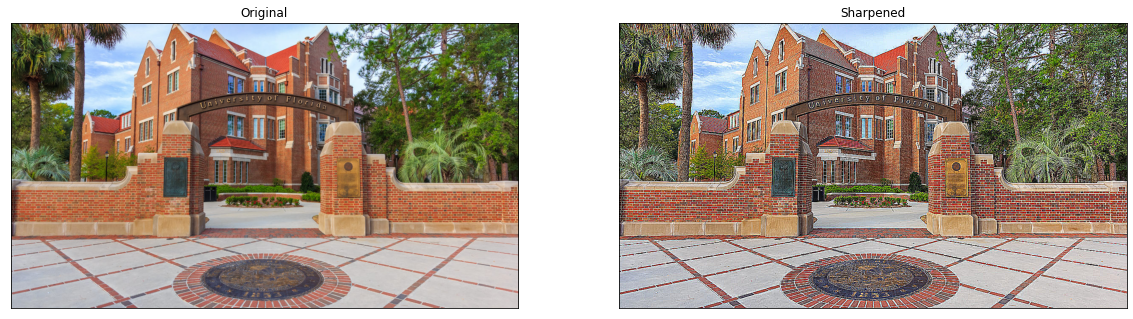

In [65]:
image = cv2.imread('florida-1200x675.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
# Applys the sharpening filter using kernel on the original image without noise
sharpened = cv2.filter2D(image, -1, kernel)
# Plots the sharpened image and the original image without noise
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.xticks([]),plt.yticks([]), plt.title("Original")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.xticks([]),plt.yticks([]), plt.title("Sharpened")
plt.imshow(sharpened)


## Edges

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result. Consider the following image:


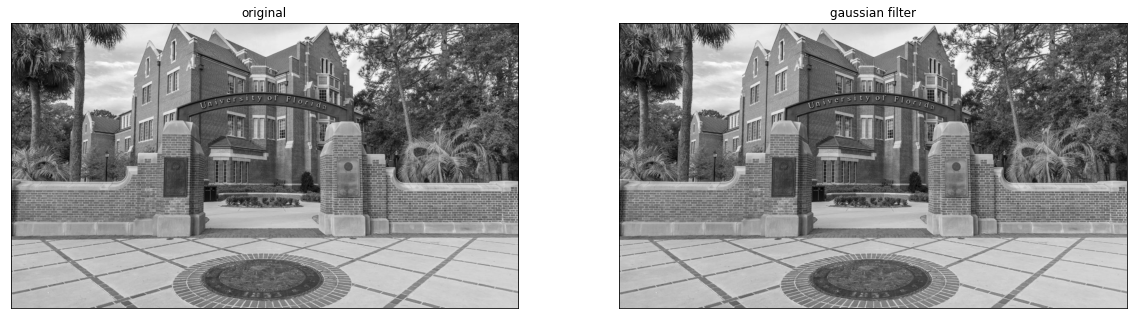

In [81]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png   
# Loads the image from the specified file
image = cv2.imread('florida-1200x675.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.title("original")
plt.imshow(img_gray ,cmap='gray')

# Filters the images using GaussianBlur on the image with noise using a 3 by 3 kernel 
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
# Renders the filtered image
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.title('gaussian filter')
plt.imshow(img_gray ,cmap='gray')

We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:
<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>
dx = 1 represents the derivative in the x-direction.  The function approximates  the derivative by  convolving   the image with the following kernel
\begin{bmatrix}
1 & 0 & -1 \\\\
2 & 0 & -2 \\\\
1 & 0 & -1
\end{bmatrix}


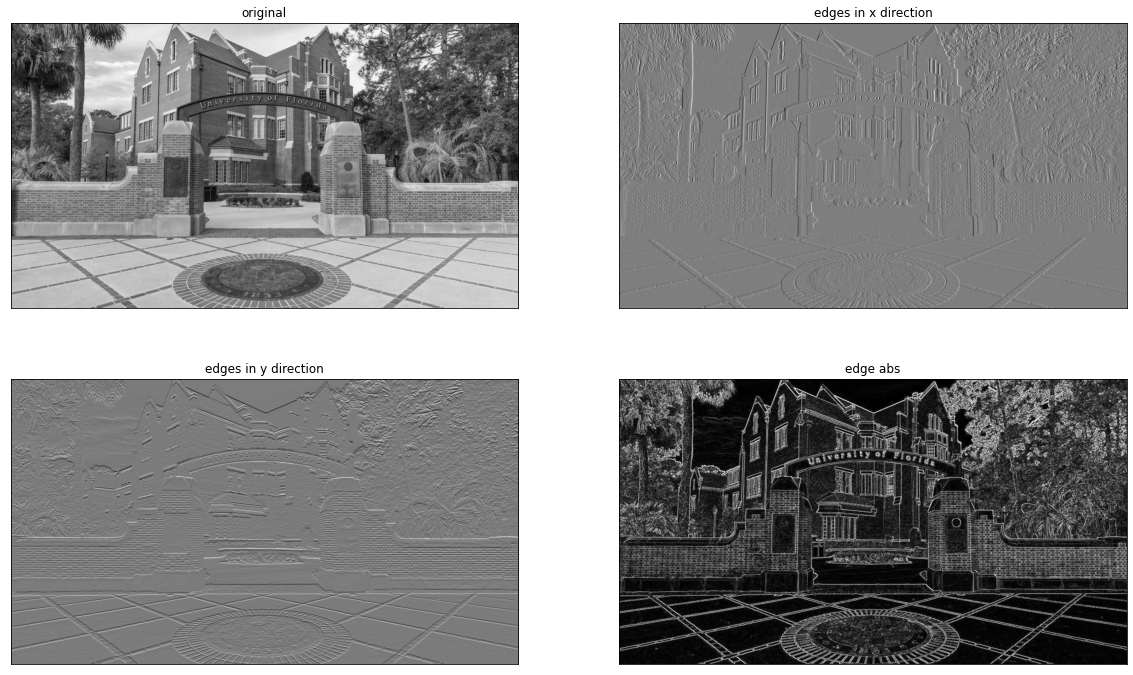

In [86]:
ddepth = cv2.CV_16S
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
plt.title("original")
plt.xticks([])
plt.yticks([])
plt.imshow(img_gray,cmap='gray')

plt.subplot(2,2,2)
# Applys the filter on the image in the X direction
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3)
plt.xticks([])
plt.yticks([])
plt.title('edges in x direction')
plt.imshow(grad_x,cmap='gray')

plt.subplot(2,2,3)
grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx = 0, dy = 1, ksize = 3)
plt.xticks([])
plt.yticks([])
plt.title("edges in y direction")
plt.imshow(grad_y, cmap="gray")

plt.subplot(2,2,4)
# Converts the values back to a number between 0 and 255
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Adds the derivative in the X and Y direction
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.xticks([])
plt.yticks([])
plt.title("edge abs")
plt.imshow(grad, cmap="gray")


# References

\[1] OpenCV Image Processing (imgproc module) tutorials https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

\[2] <a href='https://www.coursera.org/learn/introduction-computer-vision-watson-opencv'>Introduction to Computer Vision and Image Processing</a>
